In [74]:
#pip install --upgrade matplotlib

In [75]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib as mpl

In [76]:
# 读取Excel文件
df = pd.read_csv('E:\\Adocument\\Fine.csv')

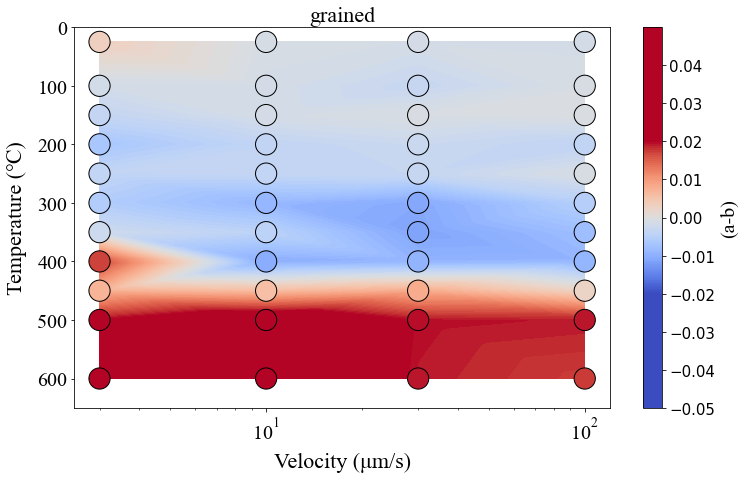

In [77]:
#%matplotlib widget能自由编辑图片？


# 获取温度、速度和不稳定指数的值
temperatures = df.iloc[:, 0].values
velocity = np.log10(df.iloc[:, 1].values)  # 对速度取对数，以10为底
instabilities = df.iloc[:, 2].values



# 创建网格并进行插值
grid_x, grid_y = np.mgrid[velocity.min():velocity.max():100j, temperatures.min():temperatures.max():100j]
#grid_x, grid_y = np.mgrid[temperatures.min():temperatures.max():100j, speeds.min():speeds.max():100j]
grid_z = griddata((velocity, temperatures), instabilities, (grid_x, grid_y), method='linear')



# 绘制等高线图
plt.figure(figsize=(12, 7))     #%  设置图片尺寸
contourf = plt.contourf(np.power(10, grid_x), grid_y, grid_z, levels=np.linspace(-0.05, 0.05, 200), cmap='coolwarm', vmin=-0.02, vmax=0.02)



#画散点图
plt.scatter(np.power(10,velocity), temperatures, s=450, c=instabilities, edgecolors='black', cmap='coolwarm',
             marker='o', linewidths= 1, label='(a-b)',  vmin=-0.02, vmax=0.02) 

cb = plt.colorbar(contourf, label='(a-b)')
cb.set_ticks(np.arange(-0.05,0.05,0.01))
cb.ax.tick_params(labelsize= 15)
font= {'family':'Times New Roman', 'size': '20'}
cb.set_label('(a-b)', fontdict= font)

#设置colorbar
#cmap = mpl.cm.RdBu_r
#norm = mpl.colors.Normalize(vmin=-0.1, vmax=0.1)
#cb = mpl.colorbar.ColorbarBase(cmap=cmap, norm=norm)
#cb.set_label('(a-b)')




#Plot图
plt.title('grained', fontdict={'family':'Times New Roman', 'size': '22'})    #%  改图名
plt.xlabel('Velocity (μm/s)', fontdict={'family':'Times New Roman', 'size': '22'})
plt.gca().xaxis.labelpad = 10
plt.xscale('log')
plt.xticks(fontsize=20, fontfamily='Times New Roman')
plt.xlim(2.5, 120)
plt.ylabel('Temperature (℃)', fontdict={'family':'Times New Roman', 'size': '22'})
plt.gca().yaxis.labelpad = 10
plt.ylim(650, 0)
plt.yticks(fontsize=20,  fontfamily='Times New Roman')
#plt.legend(loc='lower left',fontsize=10)  # 添加图例
#plt.show()
plt.savefig('E:/AResult/Figs/Fine-grained.png', dpi= 700)

In [78]:
#pip install --upgrade matplotlib